# **PORTFOLIO ALLOCATION OPTIMIZATION PROJECT**



Imagine that you are working as an adviser to a high net worth individual who wants to diversify his 10 million cash in different stocks.How would you advise him ? Well,portfolio optimization can be used to answer that.

Portfolio optimization is the proces of selecting the best portfolio(asset distribution),out of the set of all portfolios being considered,according to some objective.The objective typically maximizes factors such as expected return,and minimizes costs like financial risk.
In this project i will go through different methods of how we can optimize our portfolio.The  methods that we are going to use are :  **Monte-carlo simulation** , **Portfolio allocation optimization by function** and finally with **Pyportfolio** a library of python very useful for asset managers.

**DISCLAIMER** : Obviously the following methods should not be taken as any wise financial  advise this project especially aims to learn  the different methods to optimize a portfolio.
 
Ressources:



Portfolio optimization explained : https://en.wikipedia.org/wiki/Portfolio_optimization#:~:text=Portfolio%20optimization%20is%20the%20process,minimizes%20costs%20like%20financial%20risk.

Python for financial analysis and algorithmic trading : https://www.udemy.com/course/python-for-finance-and-trading-algorithms/

The best stocks to invest in : https://money.usnews.com/investing/stock-market-news/slideshows/best-stocks-to-buy-this-year?slide=12

Efficient frontier optimisation : https://pyportfolioopt.readthedocs.io/en/latest/EfficientFrontier.html


Optimization with pyportfolioOpt : https://pypi.org/project/pyportfolioopt/




In [ ]:
#Python librairies 
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader.data as reader
import pandas_profiling
from pandas_datareader import data as web

# Defining our portfolio 

In [ ]:
#Start and end date
date_start= datetime.datetime(2015,1,1)
date_end  = datetime.datetime.today()

#Amazon,Irobot,Walmart,Adobe,Spotify,Disney,Facebook,Ali Baba,Lowe's Cos,Nautilus,Apple,Tesla,Newmont Corp,Sono,BJ's wholesale
li_assets = ['AMZN','IRBT','WMT','ADBE','SPOT','DIS','FB','BABA','LOW','NLS','AAPL','TSLA',
            #  'NEM', 
             'SONO','BJ', 'MSFT', 'MRNA']

#Downloading the stocks 
df_portfolio = reader.get_data_yahoo(li_assets, date_start, date_end)['Adj Close']

In [ ]:
df_portfolio.head()

Symbols,AMZN,IRBT,WMT,ADBE,SPOT,DIS,FB,BABA,LOW,NLS,AAPL,TSLA,SONO,BJ,MSFT,MRNA
Date,,,,,,,,,,,,,,,,
2015-01-02,308.519989,34.840000,74.167084,72.339996,NaN,87.376266,78.449997,103.599998,60.841995,14.97,24.898552,43.862000,NaN,NaN,41.539135,NaN
2015-01-05,302.190002,33.790001,73.951225,71.980003,NaN,86.099403,77.190002,101.000000,59.386108,15.18,24.197117,42.018002,NaN,NaN,41.157158,NaN
2015-01-06,295.290009,32.939999,74.521065,70.529999,NaN,85.642708,76.150002,103.320000,59.520920,14.87,24.199400,42.256001,NaN,NaN,40.553074,NaN
2015-01-07,298.420013,33.029999,76.498276,71.110001,NaN,86.518814,76.150002,102.129997,61.291340,15.31,24.538729,42.189999,NaN,NaN,41.068310,NaN
2015-01-08,300.459991,33.240002,78.112862,72.919998,NaN,87.413536,78.180000,105.029999,62.585484,15.97,25.481558,42.124001,NaN,NaN,42.276463,NaN


Now that we have defined our stocks to invest in , one can ask ourselves how we can choose the best asset weights in order to have the best portfolio. We are going to see 4 methods of how we can choose the best portfolio weighting.

**1st method : Assign eqquivalently the weights**

**2nd Method : Monte-Carlo simulation** 

**3rd method : Portfolio optimization by a function (MARKOWITZ)** 

**Last method : Portfolio optimization with pyportfolio**

# FIRST METHOD 




Let's suppose that we assign equivalently the $1,000,000.
In the following let's compute the : 

- **Annual Returns** of the portfolio 
- **Annual volatility / risk** of the portfolio 
- **Annual variance** of the portfolio



In [ ]:
#Allocation of the portfolio 
nb_assets = len(li_assets)
weights = np.array(nb_assets*[1/nb_assets])
weights

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

$i$ : asset

$t$ : date

$p_{i, t}$ : close price of asset i on  date t

$r_{i, t}$ : return of asset i on  date t

$r_{i, t} = \frac{p_{i, t}}{p_{i, t- 1}} - 1$



In [ ]:
#Returns of the portfolio
df_ret = df_portfolio.pct_change()
df_ret.head()

Symbols,AMZN,IRBT,WMT,ADBE,SPOT,DIS,FB,BABA,LOW,NLS,AAPL,TSLA,SONO,BJ,MSFT,MRNA
Date,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020517,-0.030138,-0.002910,-0.004976,NaN,-0.014613,-0.016061,-0.025097,-0.023929,0.014028,-0.028172,-0.042041,NaN,NaN,-0.009196,NaN
2015-01-06,-0.022833,-0.025155,0.007706,-0.020145,NaN,-0.005304,-0.013473,0.022970,0.002270,-0.020422,0.000094,0.005664,NaN,NaN,-0.014677,NaN
2015-01-07,0.010600,0.002732,0.026532,0.008223,NaN,0.010230,0.000000,-0.011518,0.029745,0.029590,0.014022,-0.001562,NaN,NaN,0.012705,NaN
2015-01-08,0.006836,0.006358,0.021106,0.025453,NaN,0.010341,0.026658,0.028395,0.021115,0.043109,0.038422,-0.001564,NaN,NaN,0.029418,NaN


$W$: weights of the portfolio 

$C$ : Covariance Matrix of the Assets in the portfolio

$portfolio\_daily\_var = W^T * C * W$

$portfolio\_annually\_var = 252 * daily\_var$

$portfolio\_vol = \sqrt{W^T * C * W}$

$annually\_vol = \sqrt{252} * daily\_vol $

$\mu_{r_{i}}$ : mean asset return

$daily\_portfolio\_return = \sum_{i \in assets}{\mu_{r_{i}}}$

$annually\_portfolio\_return = 252 * daily\_portfolio\_return$


In [ ]:
weights.T

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

In [ ]:
#Covariance matrix
df_daily_cov = df_ret.cov() 
df_annually_cov = df_daily_cov * 252  #252 is number of trading days for the year 

df_annually_cov
# weights

#Annual portfolio Variance  
port_variance = np.dot(weights.T, np.dot(df_annually_cov, weights))
port_variance

port_volatility = np.sqrt(port_variance)

port_return = np.sum(df_ret.mean()*weights) * 252

print(f"Portfolio Variance: {port_variance:.2%}")
print(f"Portfolio Volatility: {port_volatility:.2%}")
print(f"Portfolio  annual returns : {port_return:.2%}")

Portfolio Variance: 5.44%
Portfolio Volatility: 23.31%
Portfolio  annual returns : 36.40%


So , if we allocate equivalently the weights the portfolio statistics will be the following : 

**Portfolio Variance** : 5.44%




**Portfolio Volatility** : 23.31%

**Portfolio  annual return** : 36.40%


One can ask ourselves if we cannot find a better allocation so we find better returns ? This is why we are going to use  some optimization methods.

#  2nd Method : Optimal portfolio allocation with the MONTE-CARLO SIMULATION

## The sharpe ratio 

Before the simulation let's discuss about the sharpe ratio.

Basically, The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.


The greater a portfolio's Sharpe ratio, the better its risk-adjusted-performance. If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio’s return, or the portfolio's return is expected to be negative. In either case, a negative Sharpe ratio does not convey any useful meaning.



$sharpe\_ratio = portfolio\_ret / portfolio\_vol$


**So, in the following we are going to optimize the portfolio by doing a thousand of allocations and after we will try to get the best allocation**.
To do so , we will use random allocations and then pick up the one with the best sharp ratio.This method is named **Monte Carlo Simulation**.Basically,thanks to those simulations we will be able to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.



In [ ]:
#Number of allocations  (number of times we will the run the simulation)
number_of_portfolios = 5000
#Array of  the weights 
all_weights = np.zeros((number_of_portfolios,len(df_portfolio.columns)))
#return array
ret_arr = np.zeros(number_of_portfolios)
#volatility array
vol_arr = np.zeros(number_of_portfolios)
#Sharpe array 
sharpe_arr = np.zeros(number_of_portfolios)

# Begin the simulation


for ind in range(number_of_portfolios):

    # Create Random Weights
    weights = np.array(np.random.random(16))

    # Rebalance Weights (So we are sure that it will be 100% allocated)
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights     #Numpy broadcast 

    # Expected Return
    ret_arr[ind] = np.sum((df_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(df_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

    # Combine them all together 
    Monte_carlo_simulations = [ret_arr,vol_arr,sharpe_arr,all_weights]
    # Create a Dataframe from the master array 
    simulations_df = pd.DataFrame(data=Monte_carlo_simulations).T

    #Add the column Names 
    simulations_df.columns = ['Returns','Volatility','Sharpe Ratio','Portfolio weights']
    # Making sure the data types are correct , we don't want our floats to be strings 
    simulations_df = simulations_df.infer_objects()

    

 **NOW LETS GRAB THE IMPORTANT METRICS AFTER THE SIMULATION**


 **Max Sharpe ratio** : WHere the excess return of the portfolio is greatest given the amount of risk we are taking on 

 **Min_volatility** 

In [ ]:
# Max sharpe ratio
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# The Min volatility from the Monte carlo simulations 
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmax()]

#Print out the results 
#MAX SHARPE RATIO
print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('_'*80)
print(max_sharpe_ratio)
print('_'*80)

#MINIMUM VOLATILITY
print('')
print('='*80)
print('MINIMUM VOLATILITY :')
print('_'*80)
print(min_volatility)
print('_'*80)


MAX SHARPE RATIO:
________________________________________________________________________________
Returns                                                       0.451358
Volatility                                                    0.241439
Sharpe Ratio                                                   1.86945
Portfolio weights    [0.07860689396409845, 0.09738934022279841, 0.1...
Name: 1466, dtype: object
________________________________________________________________________________

MINIMUM VOLATILITY :
________________________________________________________________________________
Returns                                                        0.40791
Volatility                                                    0.288273
Sharpe Ratio                                                   1.41501
Portfolio weights    [0.048407845180880565, 0.1319162296696376, 0.0...
Name: 846, dtype: object
________________________________________________________________________________


**So these are the weights where we have the maximum sharpe ratio and the mnimum volatility.**


**PLOTTING THE DATA**

Now, let's plot the relationship between the overall volatility of our portfolio, and the expected return from it.

<function matplotlib.pyplot.show>

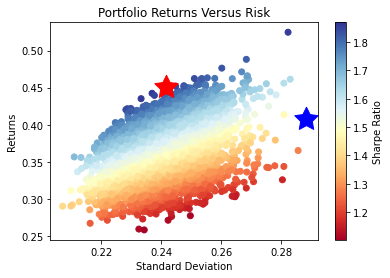

In [ ]:
#Plotting the data with a scatter plot  
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c= simulations_df['Sharpe Ratio'],
    cmap='RdYlBu')

# Title , labels 
plt.title('Portfolio Returns Versus Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot max Sharpe Ratio with red star 
plt.scatter(max_sharpe_ratio[1],
            max_sharpe_ratio[0],
            marker=(5,1,0),
            color = 'r',
            s=600
            )

# Plot max Sharpe Ratio with blue star 
plt.scatter(min_volatility[1],
            min_volatility[0],
            marker=(5,1,0),
            color = 'b',
            s=600
            )
 
plt.show

# PORTFOLIO ALLOCATION with SciPy
Now that we have run multiple random allocations let's try to see if we cannot use another efficient way. Because, if we have a bunch of data it can be tricky to launch around 5000 allocations and more.Now , instead of doing some random allocations we are going optimize our portfolio with some functions. 
With the first  function we  will try to maximize the sharp ratio ( to do so we will minimize the negative sharp ratio)

And with the second function we will use it to grab all the metrics ( returns , sharp ratio ..)

And finaly the third function will be used as a constraint.Basically, it will allow us to be insured that the weights have an allocation equal 100% , not more and not less

In [ ]:
# Step 1 
#Creation of a function  that take some weights and return back ret, volatitlity and the sharpe ratio
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(df_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
    # The minimization function 
from scipy.optimize import minimize
#Step 2 
#We want to minimize the negative sharp ratio so with this function it returns the negative sharp ratio 
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1
# Contraints
# With the constraints we will have less things to check 
# This function is here because when we add the allocations it have to be equal to 1
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0   
    '''
    return np.sum(weights) - 1
# By convention of minimize function it should be a function that returns zero for conditions
# It says that the constraint is going to be an equation type constraint 
cons = ({'type':'eq','fun': check_sum})
# 0-1 bounds for each weight
# Those bounds are here beacuase the actual weights have to be between 0 and 1 
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1),(0,1))
# Initial Guess (equal distribution)
init_guess = np.array(nb_assets*[1/nb_assets])
#Minimizing the negative sharpe function
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [ ]:
#Final results
opt_results.x
get_ret_vol_sr(opt_results.x)

array([0.61694822, 0.29782528, 2.07151054])

In [ ]:
#Optimized weighs
print('')
print('='*80)
print('OPTIMIZED WEIGHTS:')
print('_'*80)
print(opt_results.x)
print('_'*80)

#Optimized Metrics
print('')
print('='*80)
print('OPTIMIZED METRICS :')
print('_'*80)
print(get_ret_vol_sr(opt_results.x))
print('_'*80)


OPTIMIZED WEIGHTS:
________________________________________________________________________________
[4.13363211e-01 0.00000000e+00 0.00000000e+00 1.05559036e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.48177033e-02 1.52375127e-02 4.17128892e-02 1.42097728e-01
 2.73218947e-17 3.10608464e-02 0.00000000e+00 2.26151073e-01]
________________________________________________________________________________

OPTIMIZED METRICS :
________________________________________________________________________________
[0.61694822 0.29782528 2.07151054]
________________________________________________________________________________


So with that method we have that 


**Portfolio Volatility** : 63%

**Portfolio expected annual return** : 30%

**Sharpe Ratio** : 2.10


So if we have the optimal result we can now check all the optimal portfolios in order to advize on how to invest $1000000

In [ ]:
pip install PyPortfolioOpt;

# PORTFOLIO OPTIMIZATION WITH PYPORTFOLIO

PyPortFolio is a package that allows us to optimize our portfolio.So it will be the last method that we will use to optimize our portfolio.

In [ ]:
#Libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from matplotlib.ticker import FuncFormatter
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [ ]:
 
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_portfolio)
S = risk_models.sample_cov(df_portfolio)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()  
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMZN', 0.51016), ('IRBT', 0.0), ('WMT', 0.0), ('ADBE', 0.10579), ('SPOT', 0.0), ('DIS', 0.0), ('FB', 0.0), ('BABA', 0.0), ('LOW', 0.0), ('NLS', 0.0), ('AAPL', 0.00518), ('TSLA', 0.11521), ('SONO', 0.0), ('BJ', 0.0), ('MSFT', 0.0), ('MRNA', 0.26366)])
Expected annual return: 72.3%
Annual volatility: 32.0%
Sharpe Ratio: 2.20


(0.7229942220538843, 0.31973618678648835, 2.1986695629272823)

In [ ]:
#Getting the discrete allocation of each share per stock 
latest_prices = get_latest_prices(df_portfolio)

weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))


Discrete allocation: {'AMZN': 155, 'ADBE': 213, 'AAPL': 38, 'TSLA': 174, 'MRNA': 2367}
Funds remaining: $349.77


**Thanks to the package we know the amount of shares of Amazon , ADBE, NLS , AAPL , TSLA and MRNA that we can buy.At the end of the day it appears that this package is very powerful and useful**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('PORTFOLIO.ipynb')